<a href="https://colab.research.google.com/github/MuhammedFarhanPC/Rain-Prediction-Project/blob/main/Rain_Prediction_Classification_Project_Nov_16_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***Problem Statement***

The objective of this analysis is to develop a predictive model to forecast daily rainfall occurrence in Australia. Using historical weather data with features such as temperature, humidity, wind speed, and atmospheric pressure, this analysis aims to understand the relationships between these weather indicators and rainfall. By predicting the "RainTomorrow" variable, we can anticipate if it will rain the following day.

This prediction task has broad practical applications, supporting decision-making in fields like agriculture, where farmers can optimize planting schedules and irrigation; water resource management, where rainfall forecasts help in managing reservoirs and water supply; and disaster preparedness, where anticipating rainfall is essential for flood management and public safety. The analysis will also help identify which meteorological factors have the most significant influence on rainfall prediction, leading to a robust forecasting model to provide reliable, actionable insights for weather-sensitive industries and communities.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


i am imported some key libraries and modules for data manipulation, visualization, and machine learning.

In [ ]:
data=pd.read_csv('/content/weatherAUS.csv')
df=pd.DataFrame(data)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32892,2015-10-07,Sydney,19.7,21.5,0.0,13.2,1.3,SSW,67.0,SSE,...,61.0,56.0,1029.6,1033.6,5.0,7.0,20.3,19.0,No,No
32893,2015-10-08,Sydney,17.0,21.1,0.0,6.6,2.2,ENE,35.0,ESE,...,53.0,57.0,1038.8,1036.0,7.0,7.0,18.5,19.9,No,No
32894,2015-10-09,Sydney,16.8,22.7,0.0,5.4,8.7,ENE,43.0,N,...,51.0,51.0,1034.4,1029.7,7.0,5.0,20.1,22.0,No,No
32895,2015-10-10,Sydney,15.7,24.3,0.0,6.8,9.5,E,24.0,SE,...,62.0,60.0,1028.9,1025.8,1.0,4.0,21.2,22.3,No,No


# Data Understanding

he file contains weather data for Australia with 145,460 entries and 23 columns. Here’s an overview of the columns:

Date: Date of the record.

Location: Location name.

MinTemp and MaxTemp: Minimum and maximum temperatures for the day.

Rainfall: Recorded rainfall in millimeters.

Evaporation and Sunshine: Daily evaporation and sunshine duration.

WindGustDir and WindGustSpeed: Direction and speed of the strongest wind gust.

WindDir9am and WindDir3pm: Wind direction at 9 am and 3 pm.

WindSpeed9am and WindSpeed3pm: Wind speed at 9 am and 3 pm.

Humidity9am and Humidity3pm: Humidity levels at 9 am and 3 pm.

Pressure9am and Pressure3pm: Atmospheric pressure at 9 am and 3 pm.

Cloud9am and Cloud3pm: Cloud cover at 9 am and 3 pm.

Temp9am and Temp3pm: Temperature readings at 9 am and 3 pm.

RainToday and RainTomorrow: Indicators of whether it rained today or is expected to rain tomorrow.





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32897 entries, 0 to 32896
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           32897 non-null  object 
 1   Location       32897 non-null  object 
 2   MinTemp        32398 non-null  float64
 3   MaxTemp        32527 non-null  float64
 4   Rainfall       32210 non-null  float64
 5   Evaporation    13825 non-null  float64
 6   Sunshine       9380 non-null   float64
 7   WindGustDir    28030 non-null  object 
 8   WindGustSpeed  28034 non-null  float64
 9   WindDir9am     28429 non-null  object 
 10  WindDir3pm     30797 non-null  object 
 11  WindSpeed9am   32068 non-null  float64
 12  WindSpeed3pm   31422 non-null  float64
 13  Humidity9am    32231 non-null  float64
 14  Humidity3pm    31567 non-null  float64
 15  Pressure9am    26213 non-null  float64
 16  Pressure3pm    26217 non-null  float64
 17  Cloud9am       17086 non-null  float64
 18  Cloud3

In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,499
MaxTemp,370
Rainfall,687
Evaporation,19072
Sunshine,23517
WindGustDir,4867
WindGustSpeed,4863
WindDir9am,4468


In [ ]:
df.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
32892,False
32893,False
32894,False
32895,False


In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,32398.000000,32527.000000,32210.000000,13825.000000,9380.000000,28034.000000,32068.000000,31422.000000,32231.000000,31567.000000,26213.000000,26217.000000,17086.000000,16757.000000,32460.000000,31792.000000
mean,13.222822,24.002456,2.641763,5.614676,7.623433,37.353285,12.062679,16.570269,70.604635,52.355466,1018.256934,1015.671594,4.316282,4.425554,17.773512,22.540001
std,5.802436,6.003521,9.382993,4.537946,3.756077,13.339965,8.970039,8.929861,17.598010,20.630676,6.602430,6.533977,2.951712,2.720294,5.353359,5.849270
min,-4.800000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,0.300000,6.400000
25%,8.900000,19.500000,0.000000,3.000000,5.100000,28.000000,6.000000,9.000000,59.000000,37.000000,1013.900000,1011.300000,1.000000,2.000000,14.000000,18.200000
50%,13.900000,23.400000,0.000000,4.600000,8.700000,35.000000,11.000000,15.000000,71.000000,53.000000,1018.300000,1015.700000,5.000000,5.000000,18.300000,21.900000
75%,17.900000,27.600000,0.600000,7.200000,10.500000,44.000000,19.000000,22.000000,84.000000,67.000000,1022.700000,1020.100000,7.000000,7.000000,21.700000,26.100000
max,29.700000,47.300000,371.000000,86.200000,14.000000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1036.800000,9.000000,8.000000,37.700000,46.700000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32897 entries, 0 to 32896
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           32897 non-null  object 
 1   Location       32897 non-null  object 
 2   MinTemp        32398 non-null  float64
 3   MaxTemp        32527 non-null  float64
 4   Rainfall       32210 non-null  float64
 5   Evaporation    13825 non-null  float64
 6   Sunshine       9380 non-null   float64
 7   WindGustDir    28030 non-null  object 
 8   WindGustSpeed  28034 non-null  float64
 9   WindDir9am     28429 non-null  object 
 10  WindDir3pm     30797 non-null  object 
 11  WindSpeed9am   32068 non-null  float64
 12  WindSpeed3pm   31422 non-null  float64
 13  Humidity9am    32231 non-null  float64
 14  Humidity3pm    31567 non-null  float64
 15  Pressure9am    26213 non-null  float64
 16  Pressure3pm    26217 non-null  float64
 17  Cloud9am       17086 non-null  float64
 18  Cloud3

In [ ]:
df.shape

(32897, 23)

In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,499
MaxTemp,370
Rainfall,687
Evaporation,19072
Sunshine,23517
WindGustDir,4867
WindGustSpeed,4863
WindDir9am,4468


In [ ]:
df.value_counts()

Date        Location       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow
2009-01-01  Cobar          17.9     35.2     0.0       12.0         12.3      SSW          48.0           ENE         SW          6.0           20.0          20.0         13.0         1006.3       1004.4       2.0       5.0       26.6     33.4     No         No              1
2013-06-16  Moree          2.9      15.8     0.0       2.6          7.4       W            31.0           WSW         W           9.0           20.0          99.0         39.0         1017.5       1013.6       8.0       1.0       7.4      15.6     No         No              1
2013-06-15  NorfolkIsland  18.1     20.3     0.0       1.6          0.2       NNE          70.0           NNE         N           28.0          33.0          83.0         89.0         1014.6       1011.4       7.0       7.0       19.4     19.6     No         Yes             1
            Moree          9.6      15.0     0.0       3.8          5.5       WSW          35.0           WSW         WSW         24.0          17.0          86.0         63.0         1015.2       1014.6       8.0       6.0       11.6     13.9     No         No              1
2013-06-14  Sydney         11.7     20.1     0.0       3.6          7.0       W            46.0           NNW         WSW         17.0          22.0          64.0         46.0         1005.2       1002.9       2.0       6.0       14.0     18.5     No         No              1
                                                                                                                                                                                                                                                                                  ..
2010-11-12  CoffsHarbour   15.5     26.2     1.6       2.6          11.4      NNE          56.0           SSE         NNE         11.0          39.0          75.0         66.0         1015.7       1013.6       1.0       1.0       21.6     25.5     Yes        No              1
2010-11-11  Sydney         19.7     27.2     8.6       7.2          9.3       E            30.0           ESE         E           7.0           24.0          77.0         43.0         1014.9       1012.0       5.0       3.0       20.1     25.0     Yes        No              1
            NorfolkIsland  14.9     20.4     1.2       7.0          12.0      E            41.0           E           E           24.0          24.0          59.0         59.0         1022.8       1020.6       6.0       4.0       18.8     19.4     Yes        No              1
            CoffsHarbour   18.6     25.0     0.0       6.6          1.8       N            30.0           WNW         NNE         11.0          15.0          69.0         92.0         1017.7       1015.6       7.0       7.0       23.6     20.6     No         Yes             1
2016-04-26  NorfolkIsland  19.0     22.9     6.6       4.0          8.0       SE           52.0           ESE         ESE         28.0          26.0          67.0         68.0         1021.0       1019.6       3.0       4.0       20.6     20.9     Yes        No              1
Name: count, Length: 7403, dtype: int64

In [ ]:
df['Location'].value_counts()

,count
Location,
Albury,3040
Newcastle,3039
Penrith,3039
BadgerysCreek,3009
Cobar,3009
CoffsHarbour,3009
Moree,3009
NorfolkIsland,3009
Richmond,3009


In [ ]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [ ]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney'], dtype=object)

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df['Date']


,Date
0,2008-12-01
1,2008-12-02
2,2008-12-03
3,2008-12-04
4,2008-12-05
...,...
32892,2015-10-07
32893,2015-10-08
32894,2015-10-09
32895,2015-10-10


In [ ]:
# Extract year and month as separate columns
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32892,2015-10-07,Sydney,19.7,21.5,0.0,13.2,1.3,SSW,67.0,SSE,...,1029.6,1033.6,5.0,7.0,20.3,19.0,No,No,2015,10
32893,2015-10-08,Sydney,17.0,21.1,0.0,6.6,2.2,ENE,35.0,ESE,...,1038.8,1036.0,7.0,7.0,18.5,19.9,No,No,2015,10
32894,2015-10-09,Sydney,16.8,22.7,0.0,5.4,8.7,ENE,43.0,N,...,1034.4,1029.7,7.0,5.0,20.1,22.0,No,No,2015,10
32895,2015-10-10,Sydney,15.7,24.3,0.0,6.8,9.5,E,24.0,SE,...,1028.9,1025.8,1.0,4.0,21.2,22.3,No,No,2015,10


# DATA VISUALIZATION AND CLEANING

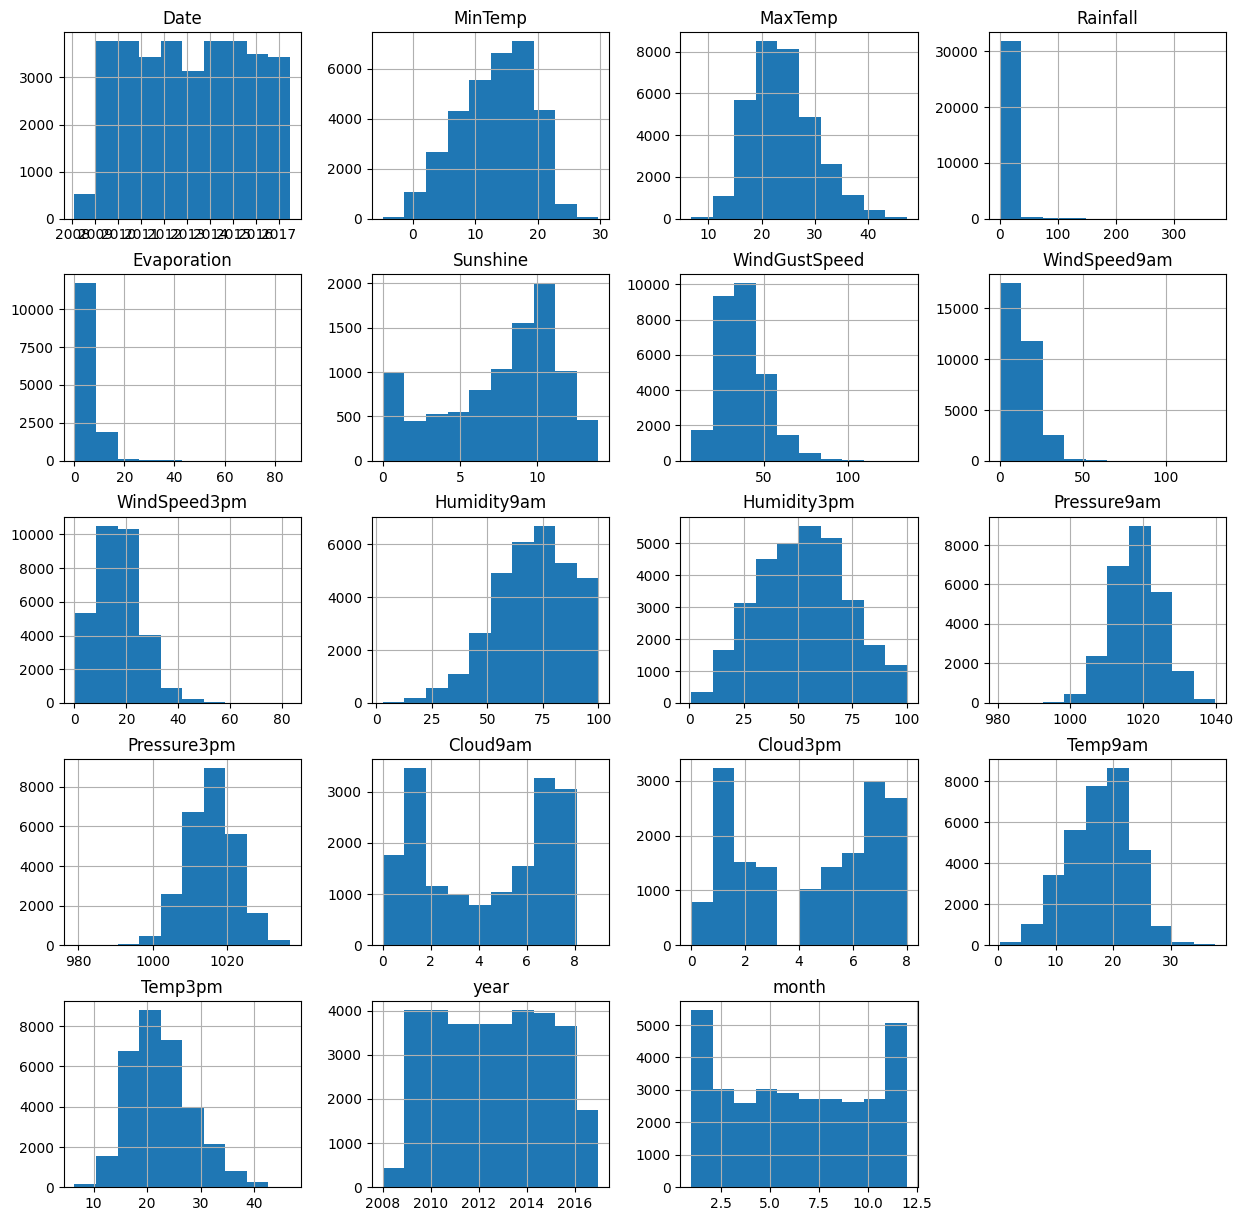

In [ ]:
df.hist(figsize=(15,15))
plt.show()

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
32892,False
32893,False
32894,False
32895,False


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop('Evaporation',axis='columns',inplace=True)
df.drop('Sunshine',axis='columns',inplace=True)
df.drop('Cloud9am',axis='columns',inplace=True)
df.drop('Cloud3pm',axis='columns',inplace=True)

In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32892,2015-10-07,Sydney,19.7,21.5,0.0,SSW,67.0,SSE,SE,39.0,...,61.0,56.0,1029.6,1033.6,20.3,19.0,No,No,2015,10
32893,2015-10-08,Sydney,17.0,21.1,0.0,ENE,35.0,ESE,E,13.0,...,53.0,57.0,1038.8,1036.0,18.5,19.9,No,No,2015,10
32894,2015-10-09,Sydney,16.8,22.7,0.0,ENE,43.0,N,NE,15.0,...,51.0,51.0,1034.4,1029.7,20.1,22.0,No,No,2015,10
32895,2015-10-10,Sydney,15.7,24.3,0.0,E,24.0,SE,E,2.0,...,62.0,60.0,1028.9,1025.8,21.2,22.3,No,No,2015,10


In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,499
MaxTemp,370
Rainfall,687
WindGustDir,4867
WindGustSpeed,4863
WindDir9am,4468
WindDir3pm,2100
WindSpeed9am,829


In [ ]:
df.shape

(32897, 21)

In [ ]:
df['MinTemp'].fillna(df['MinTemp'].median(),inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].median(),inplace=True)
df['Rainfall'].fillna(df['Rainfall'].median(),inplace=True)
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0],inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].median(),inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0],inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0],inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].median(),inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median(),inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].median(),inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].median(),inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].median(),inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].median(),inplace=True)
df['Temp9am'].fillna(df['Temp9am'].median(),inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].median(),inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0],inplace=True)
df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0],inplace=True)


<ipython-input-28-8aeb5af36305>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MinTemp'].fillna(df['MinTemp'].median(),inplace=True)
<ipython-input-28-8aeb5af36305>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0
WindSpeed9am,0


In [ ]:
df['WindDir3pm']

,WindDir3pm
0,WNW
1,WSW
2,WSW
3,E
4,NW
...,...
32892,SE
32893,E
32894,NE
32895,E


In [ ]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32897 entries, 0 to 32896
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           32897 non-null  datetime64[ns]
 1   Location       32897 non-null  object        
 2   MinTemp        32897 non-null  float64       
 3   MaxTemp        32897 non-null  float64       
 4   Rainfall       32897 non-null  float64       
 5   WindGustDir    32897 non-null  object        
 6   WindGustSpeed  32897 non-null  float64       
 7   WindDir9am     32897 non-null  object        
 8   WindDir3pm     32897 non-null  object        
 9   WindSpeed9am   32897 non-null  float64       
 10  WindSpeed3pm   32897 non-null  float64       
 11  Humidity9am    32897 non-null  float64       
 12  Humidity3pm    32897 non-null  float64       
 13  Pressure9am    32897 non-null  float64       
 14  Pressure3pm    32897 non-null  float64       
 15  Temp9am        3289

In [ ]:
labelencoder = LabelEncoder()
df['Location'] = labelencoder.fit_transform(df['Location'])
df['WindGustDir'] = labelencoder.fit_transform(df['WindGustDir'])
df['WindDir9am'] = labelencoder.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = labelencoder.fit_transform(df['WindDir3pm'])
df['RainToday'] = labelencoder.fit_transform(df['RainToday'])
df['RainTomorrow'] = labelencoder.fit_transform(df['RainTomorrow'])



In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month
0,2008-12-01,0,13.4,22.9,0.6,13,44.0,13,14,20.0,...,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,2008,12
1,2008-12-02,0,7.4,25.1,0.0,14,44.0,6,15,4.0,...,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,2008,12
2,2008-12-03,0,12.9,25.7,0.0,15,46.0,13,15,19.0,...,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,2008,12
3,2008-12-04,0,9.2,28.0,0.0,4,24.0,9,0,11.0,...,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,2008,12
4,2008-12-05,0,17.5,32.3,1.0,13,41.0,1,7,7.0,...,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32892,2015-10-07,10,19.7,21.5,0.0,11,67.0,10,9,39.0,...,61.0,56.0,1029.6,1033.6,20.3,19.0,0,0,2015,10
32893,2015-10-08,10,17.0,21.1,0.0,1,35.0,2,0,13.0,...,53.0,57.0,1038.8,1036.0,18.5,19.9,0,0,2015,10
32894,2015-10-09,10,16.8,22.7,0.0,1,43.0,3,4,15.0,...,51.0,51.0,1034.4,1029.7,20.1,22.0,0,0,2015,10
32895,2015-10-10,10,15.7,24.3,0.0,0,24.0,9,0,2.0,...,62.0,60.0,1028.9,1025.8,21.2,22.3,0,0,2015,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32897 entries, 0 to 32896
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           32897 non-null  datetime64[ns]
 1   Location       32897 non-null  int64         
 2   MinTemp        32897 non-null  float64       
 3   MaxTemp        32897 non-null  float64       
 4   Rainfall       32897 non-null  float64       
 5   WindGustDir    32897 non-null  int64         
 6   WindGustSpeed  32897 non-null  float64       
 7   WindDir9am     32897 non-null  int64         
 8   WindDir3pm     32897 non-null  int64         
 9   WindSpeed9am   32897 non-null  float64       
 10  WindSpeed3pm   32897 non-null  float64       
 11  Humidity9am    32897 non-null  float64       
 12  Humidity3pm    32897 non-null  float64       
 13  Pressure9am    32897 non-null  float64       
 14  Pressure3pm    32897 non-null  float64       
 15  Temp9am        3289

In [ ]:
df.drop('Date',axis='columns',inplace=True)

In [ ]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler,NearMiss

# Assuming 'df' is your DataFrame with 'target_column' as the target variable
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

# Create an undersampler object
rus = NearMiss()

# Apply the undersampler to the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df = pd.concat([X_resampled, y_resampled], axis=1)

In [ ]:
"""from imblearn.over_sampling import RandomOverSampler, SMOTE
import pandas as pd

# Assuming 'df' is your DataFrame with 'RainTomorrow' as the target variable
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

# Create an oversampler object (choose either RandomOverSampler or SMOTE)
# For RandomOverSampler
ros = RandomOverSampler()

# For SMOTE
# ros = SMOTE()

# Apply the oversampler to the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)"""

"from imblearn.over_sampling import RandomOverSampler, SMOTE\nimport pandas as pd\n\n# Assuming 'df' is your DataFrame with 'RainTomorrow' as the target variable\nX = df.drop('RainTomorrow', axis=1)\ny = df['RainTomorrow']\n\n# Create an oversampler object (choose either RandomOverSampler or SMOTE)\n# For RandomOverSampler\nros = RandomOverSampler()\n\n# For SMOTE\n# ros = SMOTE()\n\n# Apply the oversampler to the data\nX_resampled, y_resampled = ros.fit_resample(X, y)\n\n# Create a new DataFrame with the resampled data\ndf_resampled = pd.concat([X_resampled, y_resampled], axis=1)"

In [ ]:
df1=df.copy()
df1

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,year,month,RainTomorrow
0,5,13.9,23.4,0.0,5,35.0,12,9,11.0,15.0,71.0,53.0,1018.3,1015.7,18.3,21.9,0,2017,4,0
1,5,13.9,23.4,0.0,5,35.0,12,9,11.0,15.0,71.0,53.0,1018.3,1015.7,18.3,21.9,0,2017,4,0
2,5,13.9,23.4,0.0,5,35.0,12,9,11.0,15.0,71.0,53.0,1018.3,1015.7,18.3,21.9,0,2017,4,0
3,5,13.9,23.4,0.0,5,35.0,12,9,11.0,15.0,71.0,53.0,1018.3,1015.7,18.3,21.9,0,2017,4,0
4,5,13.9,23.4,0.0,5,35.0,12,9,11.0,15.0,71.0,53.0,1018.3,1015.7,18.3,21.9,0,2017,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14315,10,13.6,20.0,2.2,8,52.0,8,8,20.0,26.0,65.0,44.0,1026.2,1025.5,15.8,18.9,1,2015,9,1
14316,10,10.0,16.2,0.2,8,69.0,11,11,31.0,35.0,55.0,74.0,1025.5,1025.4,13.3,11.7,0,2015,9,1
14317,10,8.3,16.3,3.2,8,65.0,11,11,22.0,28.0,63.0,62.0,1025.6,1024.6,13.0,13.6,1,2015,9,1
14318,10,10.1,16.4,31.8,8,54.0,8,10,13.0,26.0,91.0,63.0,1029.3,1027.8,13.4,15.9,1,2015,9,1


In [ ]:
df1.skew()

,0
Location,-0.232878
MinTemp,-0.545215
MaxTemp,0.375056
Rainfall,8.070707
WindGustDir,0.393114
WindGustSpeed,1.240713
WindDir9am,-0.488205
WindDir3pm,-0.116157
WindSpeed9am,0.761650
WindSpeed3pm,0.652008


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


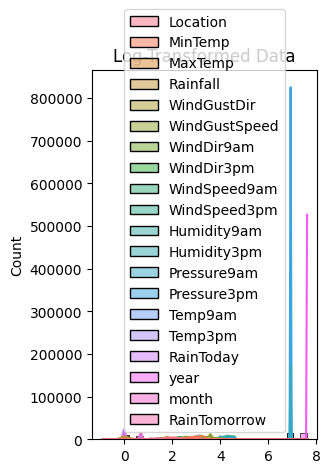

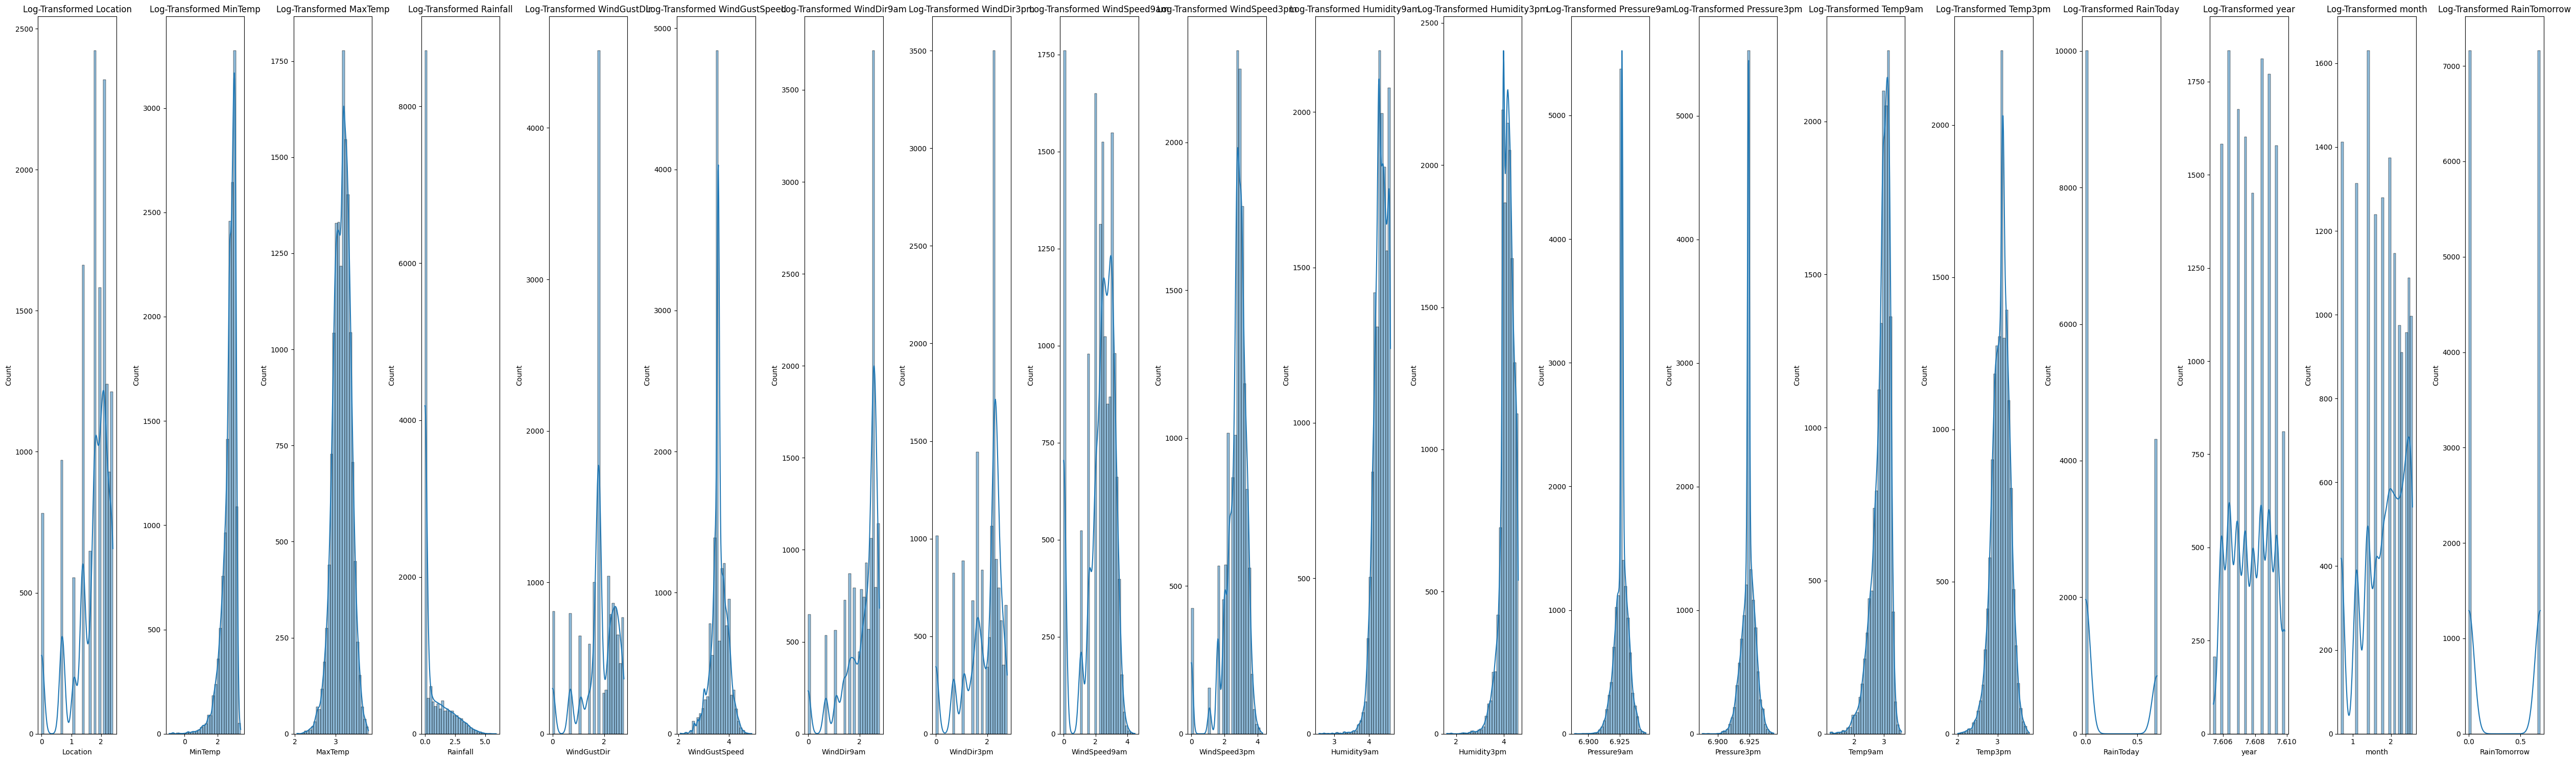

In [ ]:
#To handle skewness
import numpy as np
log_data = np.log(df1 + 1)  # Adding 1 to avoid log(0)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

<Axes: >

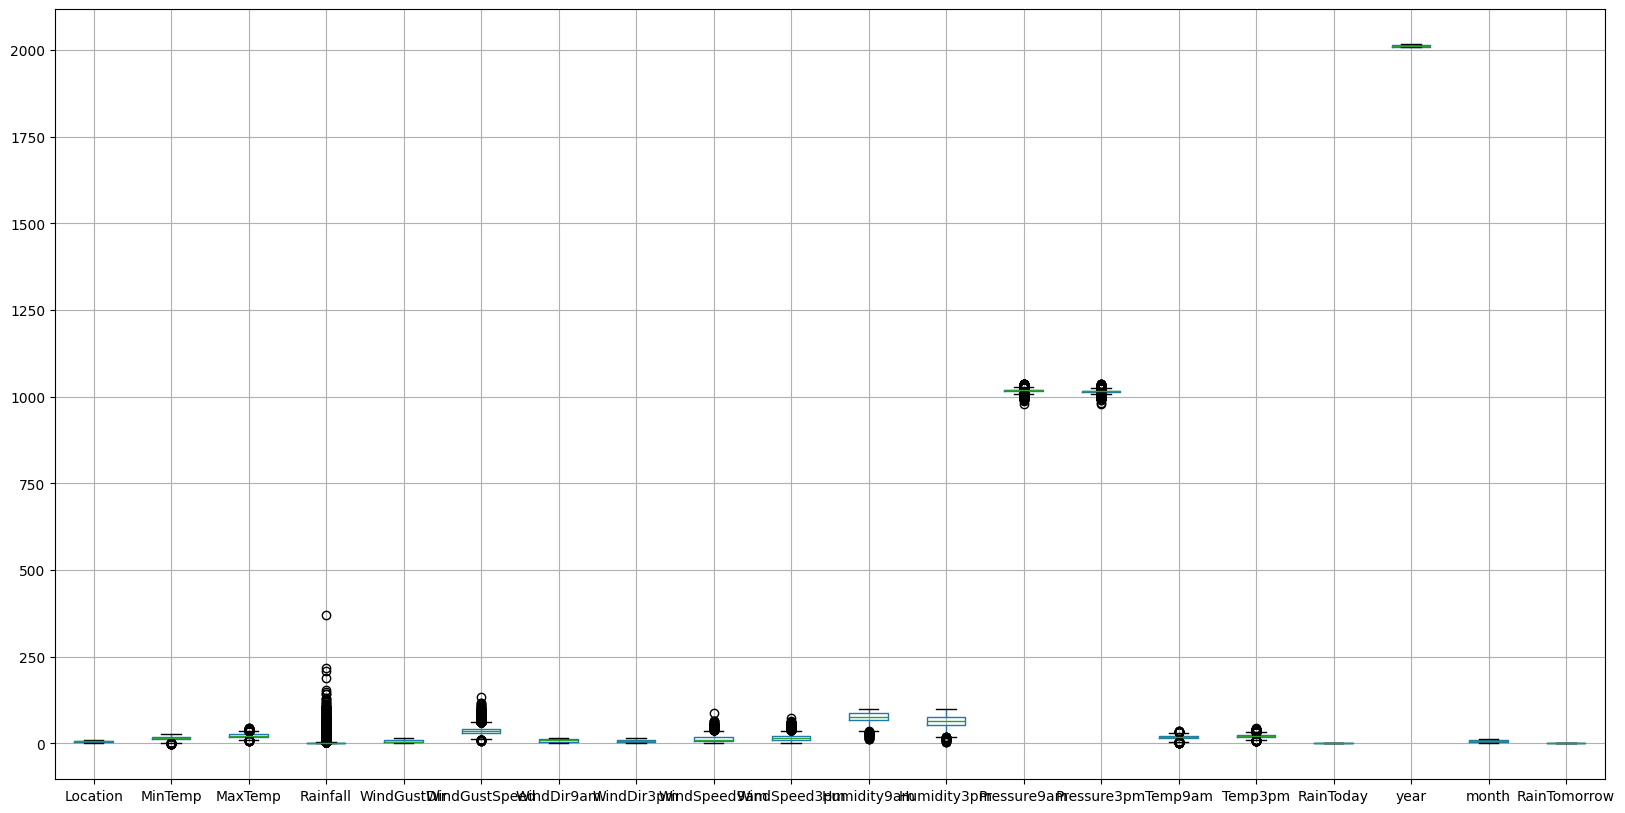

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot()


In [ ]:
def remove_outliers_iqr(df1, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5  * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers from the DataFrame
    df1_filtered = df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]
    return df1_filtered

list1=df1.columns.tolist()
list1.remove('RainTomorrow')

for i in list1:
    df1 = remove_outliers_iqr(df1, i)

{'whiskers': [<matplotlib.lines.Line2D at 0x7bf982ee0d60>,
 'caps': [<matplotlib.lines.Line2D at 0x7bf982f1d0f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bf982ee0250>],
 'medians': [<matplotlib.lines.Line2D at 0x7bf982f1ceb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bf982e5c6d0>],
 'means': []}

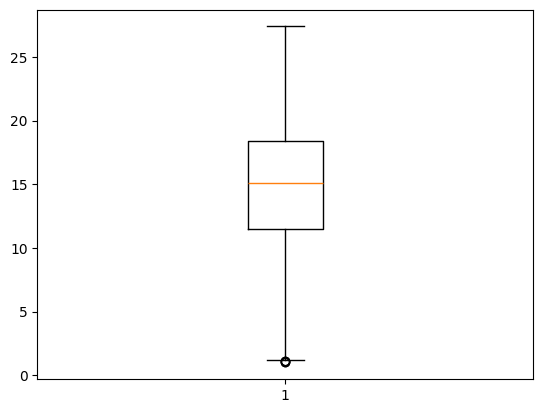

In [ ]:
plt.boxplot(df1['MinTemp'])

<Axes: >

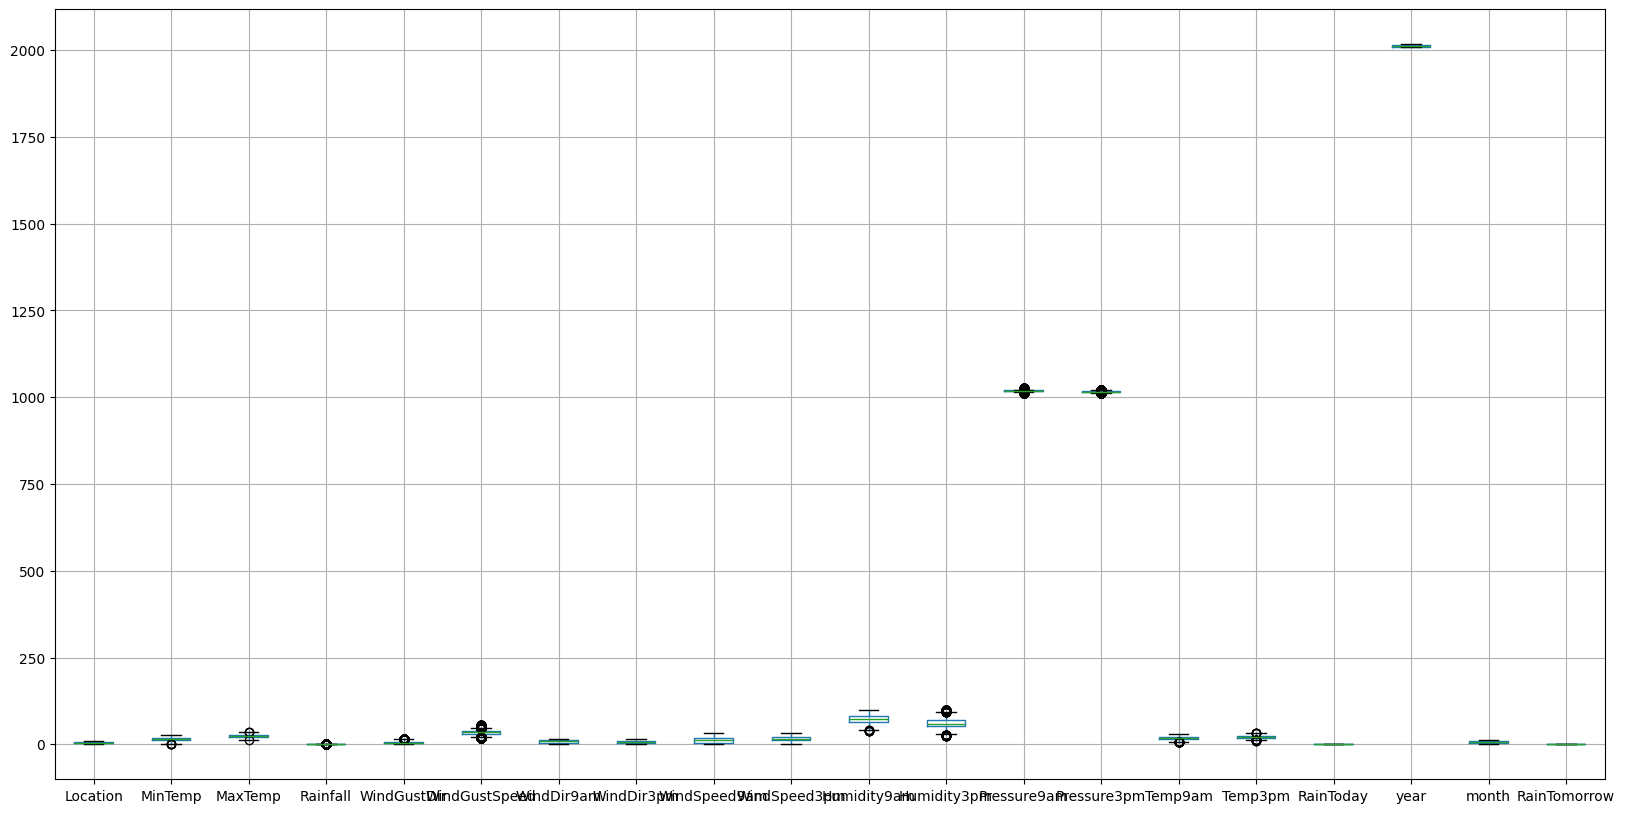

In [ ]:
plt.figure(figsize=(20,10))
df1.boxplot()

In [ ]:
df1['RainTomorrow'].unique()

array([0, 1])

In [ ]:
df.shape

(14320, 20)

# Correlation

In [ ]:
df1.corr()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,year,month,RainTomorrow
Location,1.000000,0.186162,-0.016623,0.032678,0.061622,0.022138,0.000737,-0.063426,0.067127,0.083139,0.029167,0.079099,-0.022273,0.042541,0.071109,-0.008097,NaN,-0.120241,-0.034274,-0.051072
MinTemp,0.186162,1.000000,0.646208,0.052929,-0.054364,0.240326,-0.177620,-0.135492,0.273859,0.311979,-0.061373,0.254581,-0.269924,-0.112134,0.898918,0.604380,NaN,0.027483,-0.303024,-0.000439
MaxTemp,-0.016623,0.646208,1.000000,-0.108617,-0.209233,0.122253,-0.172445,-0.209625,-0.051018,0.100646,-0.063541,-0.227458,-0.184005,-0.195053,0.769118,0.902761,NaN,0.088356,-0.281667,-0.098583
Rainfall,0.032678,0.052929,-0.108617,1.000000,0.055798,0.036544,0.054161,0.036399,0.024153,0.009811,0.175706,0.142251,-0.049593,-0.002130,-0.036866,-0.095276,NaN,0.002612,-0.033443,0.097883
WindGustDir,0.061622,-0.054364,-0.209233,0.055798,1.000000,0.071257,0.312512,0.461319,0.103899,0.025480,-0.067440,0.095294,-0.111360,-0.013008,-0.102367,-0.224885,NaN,-0.020644,0.061919,0.136293
WindGustSpeed,0.022138,0.240326,0.122253,0.036544,0.071257,1.000000,-0.177518,0.046140,0.444725,0.494503,-0.266442,0.052888,-0.156415,-0.097561,0.243212,0.083396,NaN,-0.046938,0.025939,0.108599
WindDir9am,0.000737,-0.177620,-0.172445,0.054161,0.312512,-0.177518,1.000000,0.361115,-0.319087,-0.215970,0.120257,-0.010120,-0.018448,0.019024,-0.209585,-0.160746,NaN,-0.024190,-0.000176,-0.047366
WindDir3pm,-0.063426,-0.135492,-0.209625,0.036399,0.461319,0.046140,0.361115,1.000000,-0.066749,-0.148473,-0.073188,0.016526,-0.174668,-0.078404,-0.149131,-0.254844,NaN,0.025873,0.088989,0.042993
WindSpeed9am,0.067127,0.273859,-0.051018,0.024153,0.103899,0.444725,-0.319087,-0.066749,1.000000,0.563361,-0.396027,0.105461,-0.030505,0.094414,0.231160,-0.042121,NaN,-0.015500,0.012984,0.044160
WindSpeed3pm,0.083139,0.311979,0.100646,0.009811,0.025480,0.494503,-0.215970,-0.148473,0.563361,1.000000,-0.288192,0.073967,-0.018355,0.067197,0.327322,0.094436,NaN,0.035025,-0.027691,-0.013769


In [ ]:
df1.drop('RainToday',axis='columns',inplace=True)

In [ ]:
df1

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,year,month,RainTomorrow
0,5,13.9,23.4,0.0,5,35.0,12,9,11.0,15.0,71.0,53.0,1018.3,1015.7,18.3,21.9,2017,4,0
1,5,13.9,23.4,0.0,5,35.0,12,9,11.0,15.0,71.0,53.0,1018.3,1015.7,18.3,21.9,2017,4,0
2,5,13.9,23.4,0.0,5,35.0,12,9,11.0,15.0,71.0,53.0,1018.3,1015.7,18.3,21.9,2017,4,0
3,5,13.9,23.4,0.0,5,35.0,12,9,11.0,15.0,71.0,53.0,1018.3,1015.7,18.3,21.9,2017,4,0
4,5,13.9,23.4,0.0,5,35.0,12,9,11.0,15.0,71.0,53.0,1018.3,1015.7,18.3,21.9,2017,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14290,10,13.6,22.6,0.0,6,30.0,14,15,13.0,19.0,57.0,29.0,1020.7,1019.5,17.1,21.9,2015,6,1
14303,10,8.3,13.4,0.2,7,43.0,11,13,13.0,13.0,91.0,68.0,1016.8,1013.7,10.3,12.9,2015,7,1
14308,10,12.9,28.3,0.0,6,33.0,3,3,19.0,11.0,45.0,32.0,1021.0,1016.2,19.8,26.9,2015,8,1
14312,10,8.0,18.8,0.0,14,31.0,13,1,11.0,19.0,61.0,46.0,1018.0,1012.0,11.9,18.6,2015,9,1


<Axes: >

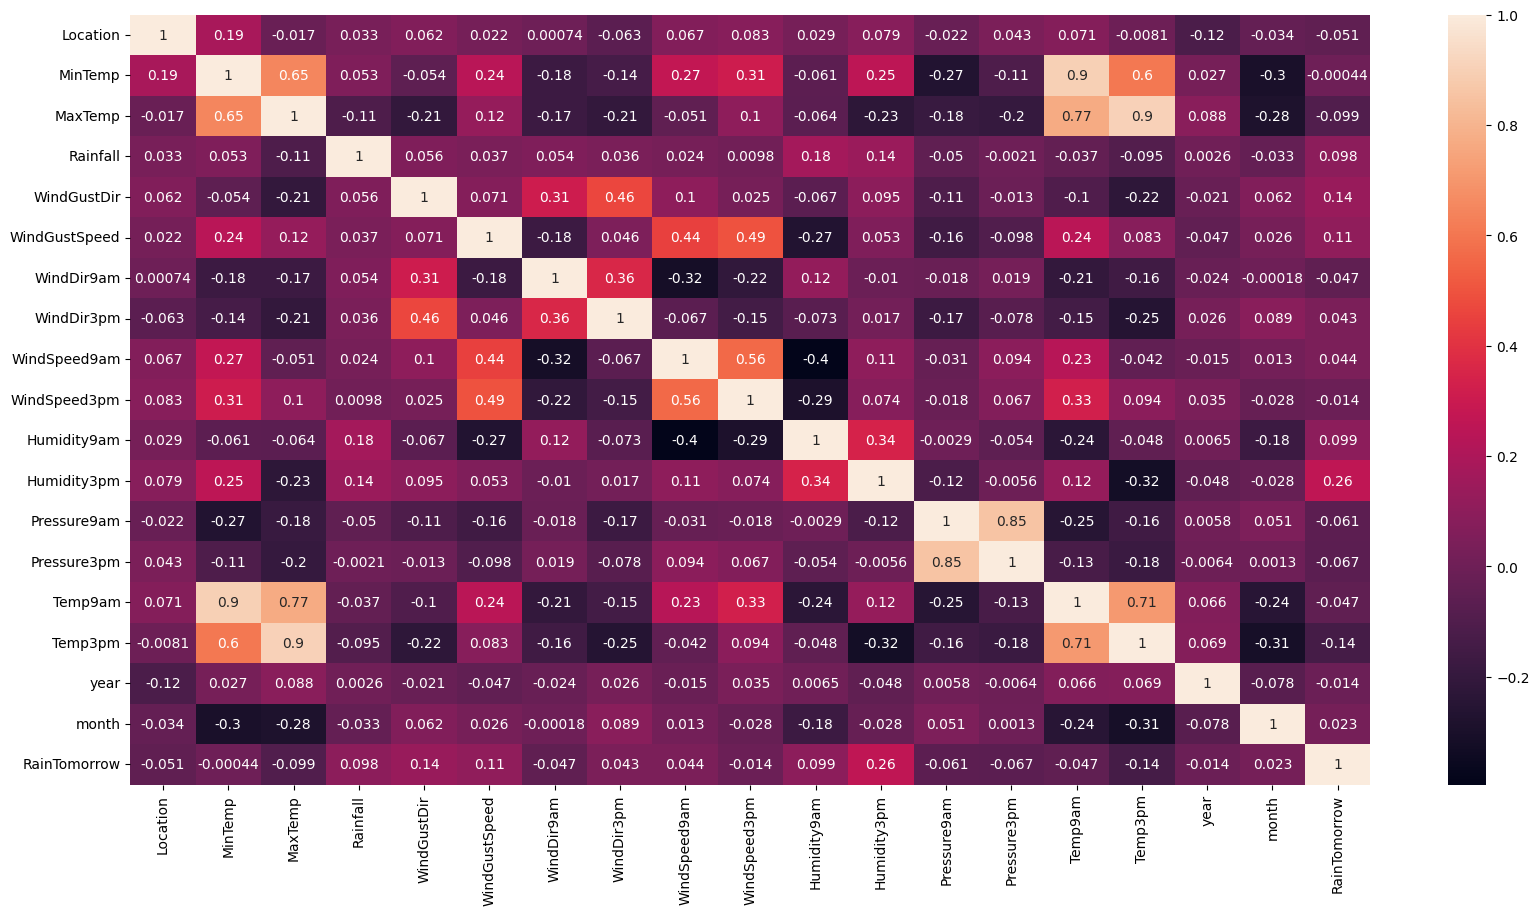

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True)

In [ ]:
df1.corr()['RainTomorrow'].sort_values(ascending=False)

,RainTomorrow
RainTomorrow,1.000000
Humidity3pm,0.260900
WindGustDir,0.136293
WindGustSpeed,0.108599
Humidity9am,0.099466
Rainfall,0.097883
WindSpeed9am,0.044160
WindDir3pm,0.042993
month,0.023373
MinTemp,-0.000439


In [ ]:
df1.drop('WindDir9am',axis='columns',inplace=True)
df1.drop('month',axis='columns',inplace=True)
df1.drop('Temp9am',axis='columns',inplace=True)
df1.drop('Temp3pm',axis='columns',inplace=True)
# df1.drop('Pressure3pm',axis='columns',inplace=True)
df1.drop('year',axis='columns',inplace=True)
df1.drop('Location',axis='columns',inplace=True)
df1.drop('Rainfall',axis='columns',inplace=True)

In [ ]:
df1

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainTomorrow
0,13.9,23.4,5,35.0,9,11.0,15.0,71.0,53.0,1018.3,1015.7,0
1,13.9,23.4,5,35.0,9,11.0,15.0,71.0,53.0,1018.3,1015.7,0
2,13.9,23.4,5,35.0,9,11.0,15.0,71.0,53.0,1018.3,1015.7,0
3,13.9,23.4,5,35.0,9,11.0,15.0,71.0,53.0,1018.3,1015.7,0
4,13.9,23.4,5,35.0,9,11.0,15.0,71.0,53.0,1018.3,1015.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14290,13.6,22.6,6,30.0,15,13.0,19.0,57.0,29.0,1020.7,1019.5,1
14303,8.3,13.4,7,43.0,13,13.0,13.0,91.0,68.0,1016.8,1013.7,1
14308,12.9,28.3,6,33.0,3,19.0,11.0,45.0,32.0,1021.0,1016.2,1
14312,8.0,18.8,14,31.0,1,11.0,19.0,61.0,46.0,1018.0,1012.0,1


In [ ]:
df.shape

(14320, 20)

In [ ]:
df1.shape

(6811, 12)

In [ ]:
df1

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainTomorrow
0,13.9,23.4,5,35.0,9,11.0,15.0,71.0,53.0,1018.3,1015.7,0
1,13.9,23.4,5,35.0,9,11.0,15.0,71.0,53.0,1018.3,1015.7,0
2,13.9,23.4,5,35.0,9,11.0,15.0,71.0,53.0,1018.3,1015.7,0
3,13.9,23.4,5,35.0,9,11.0,15.0,71.0,53.0,1018.3,1015.7,0
4,13.9,23.4,5,35.0,9,11.0,15.0,71.0,53.0,1018.3,1015.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14290,13.6,22.6,6,30.0,15,13.0,19.0,57.0,29.0,1020.7,1019.5,1
14303,8.3,13.4,7,43.0,13,13.0,13.0,91.0,68.0,1016.8,1013.7,1
14308,12.9,28.3,6,33.0,3,19.0,11.0,45.0,32.0,1021.0,1016.2,1
14312,8.0,18.8,14,31.0,1,11.0,19.0,61.0,46.0,1018.0,1012.0,1


In [ ]:
df1.drop('Pressure3pm',axis='columns',inplace=True)

# Feature Engineering

In [ ]:
x=df1[['MinTemp','MaxTemp','WindGustDir','WindGustSpeed','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am']]#independent_feature
y=df1['RainTomorrow']#dependent_features

In [ ]:
# # Initialize the MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))

# # Apply the scaler to the independent features
# x_scaled = scaler.fit_transform(x)

In [ ]:
# scaler_y = MinMaxScaler(feature_range=(0, 1))

# y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(5448, 10)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# Initialize and train the classifier
#model = RandomForestClassifier()
#model=SVC()
model=KNeighborsClassifier(n_neighbors=10)
#model=LogisticRegression()
model.fit(x_train, y_train)

# Predict on test set
y_pred = model.predict(x_test)

In [ ]:
 #KNeighborsClassifier(n_neighbors=10)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.7527512839325018


In [ ]:
print(confusion_matrix(y_test, y_pred))
print( classification_report(y_test, y_pred))

[[933  32]
 [305  93]]
              precision    recall  f1-score   support

           0       0.75      0.97      0.85       965
           1       0.74      0.23      0.36       398

    accuracy                           0.75      1363
   macro avg       0.75      0.60      0.60      1363
weighted avg       0.75      0.75      0.70      1363



In [ ]:
import pandas as pd
df1.to_string()

'       MinTemp  MaxTemp  WindGustDir  WindGustSpeed  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  RainTomorrow\n0         13.9     23.4            5           35.0           9          11.0          15.0         71.0         53.0       1018.3             0\n1         13.9     23.4            5           35.0           9          11.0          15.0         71.0         53.0       1018.3             0\n2         13.9     23.4            5           35.0           9          11.0          15.0         71.0         53.0       1018.3             0\n3         13.9     23.4            5           35.0           9          11.0          15.0         71.0         53.0       1018.3             0\n4         13.9     23.4            5           35.0           9          11.0          15.0         71.0         53.0       1018.3             0\n5         13.9     23.4            5           35.0           9          11.0          15.0         71.0         53.0      

In [ ]:
df1.tail(10)

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainTomorrow
14260,20.1,23.8,9,44.0,10,6.0,30.0,76.0,77.0,1015.6,1
14263,20.1,21.9,10,44.0,8,22.0,17.0,70.0,65.0,1019.9,1
14275,17.7,31.7,10,41.0,1,4.0,15.0,67.0,44.0,1022.4,1
14276,19.7,28.6,7,54.0,3,19.0,26.0,71.0,51.0,1017.8,1
14288,14.5,21.8,8,41.0,8,20.0,19.0,67.0,58.0,1018.6,1
14290,13.6,22.6,6,30.0,15,13.0,19.0,57.0,29.0,1020.7,1
14303,8.3,13.4,7,43.0,13,13.0,13.0,91.0,68.0,1016.8,1
14308,12.9,28.3,6,33.0,3,19.0,11.0,45.0,32.0,1021.0,1
14312,8.0,18.8,14,31.0,1,11.0,19.0,61.0,46.0,1018.0,1
14314,12.2,19.9,8,43.0,9,9.0,28.0,53.0,57.0,1018.4,1


In [ ]:
MinTemp=float(input('enter MinTemp :'))
MaxTemp=float(input('enter MaxTemp :'))
WindGustDir=float(input('enter WindGustDir:'))
WindGustSpeed=float(input('enter WindGustSpeed:'))
WindDir3pm=float(input('enter 	WindDir3pm :'))
WindSpeed9am=float(input('enter WindSpeed9am :'))
WindSpeed3pm=float(input('enter WindSpeed3pm:'))
Humidity9am=float(input('enter Humidity9am:'))
Humidity3pm=float(input('enter Humidity3pm:'))
Pressure9am=float(input('enter Pressure9am:'))
#Pressure3pm=float(input('enter Pressure3pm:'))



user_input=[[MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am]]
RainTomorrow=model.predict(user_input)
print(f'The Predicted :{RainTomorrow}')

In [ ]:
df['RainTomorrow'].value_counts()

# Project Report and Documentation: Rainfall Prediction in Australia

1. Executive Summary
This project focuses on developing a predictive model for rainfall in Australia using historical weather data. Accurate predictions support sectors like agriculture, water resource management, and disaster preparedness by identifying significant weather features (e.g., temperature, humidity, and wind) that correlate with rainfall occurrences.

2. Introduction and Problem Statement
The project aims to forecast "RainTomorrow" (whether it will rain the next day) by analyzing weather data that includes temperature, humidity, wind, atmospheric pressure, and cloud cover from multiple locations across Australia. This data-driven approach identifies factors that increase rainfall likelihood, providing insights that can assist in decision-making for weather-sensitive activities.

3. Data Description and Preprocessing
The dataset comprises 23 features across 145,460 entries, representing daily weather conditions in Australia.

Primary Features:

Temperature: MinTemp and MaxTemp (minimum and maximum daily temperatures)
Rainfall: Rainfall amount (mm) for the day
Wind Measurements: Wind speed and direction at various times
Humidity and Pressure: Humidity and pressure at 9 am and 3 pm
RainToday and RainTomorrow: Indicators for rain occurrence on the current day and the next day
Data Cleaning:

Missing Values: Missing entries were handled by imputation (mean/median for numerical variables, mode for categorical variables) or by creating an “unknown” category when appropriate.
4. Sampling
To ensure robust model training and evaluation, the dataset was split into separate training and testing sets. Sampling was done to create balanced splits while preserving the natural distribution of the target variable:

Training and Testing Split: The data was divided into an 80% training set and a 20% testing set, a common practice to provide sufficient data for model learning while reserving a portion for unbiased performance evaluation.

Stratified Sampling: Since rainfall occurrences (the target variable) can be imbalanced (fewer rainy days compared to non-rainy days), stratified sampling was used. This ensured that both the training and testing sets maintained the same proportion of "RainTomorrow" values, helping the model generalize better to both rainy and non-rainy predictions.

Data Sampling Outcome: Stratified sampling improved model reliability by preserving the distribution of the target variable, reducing the likelihood of biased predictions and improving real-world performance when applied to unbalanced weather data.

5. Exploratory Data Analysis (EDA)
EDA involved analyzing the dataset’s structure and feature relationships to identify trends and correlations.

Distribution Analysis: Histograms and box plots displayed feature distributions, showing variations and outliers in data such as temperature ranges and rainfall levels.

Correlation Analysis: A heatmap revealed feature correlations, identifying that humidity, temperature, and pressure readings significantly influence rainfall prediction.

6. Feature Engineering
Feature engineering prepared the data for model training:

Encoding Categorical Variables: Label encoding converted categorical variables, like wind direction, into numerical form.
Scaling Numerical Variables: MinMaxScaler normalized numerical values, which helps models interpret features on a consistent scale.
Derived Features: Created new features, such as temperature differentials, to capture more nuanced weather patterns.
7. Model Development and Evaluation
Several machine learning models were evaluated on predictive accuracy:

Models Used:

Linear Regression: Established a baseline by assessing linear relationships.

Decision Trees: Captured non-linear relationships in the dataset.

Other Algorithms: Models such as Random Forest or Support Vector Machines were tested to improve accuracy.
Evaluation Metrics:

Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² Score were used to evaluate performance on the test set. The final model was chosen based on its ability to balance accuracy and reliability.
8. Conclusion
This project showed that humidity, temperature, and wind are significant factors in predicting rainfall. The final model effectively predicts rainfall, contributing to forecasting efforts and practical decision-making in weather-dependent fields.

9. Future Work
To further enhance this model, potential steps include:

Advanced Model Tuning: Fine-tuning hyperparameters for each algorithm to boost performance.
Additional Data Sources: Incorporating external factors (e.g., climate indices) to improve model insights.
Ensemble or Deep Learning Techniques: Testing more advanced algorithms to refine prediction accuracy.
